#Cargar los datos


In [ ]:
import pandas                  as pd
from   scipy import stats
import numpy                   as np
import matplotlib.pyplot       as plt
import seaborn                 as sns
import statsmodels.formula.api as sm
import statsmodels.api as sma


url_test = 'https://raw.githubusercontent.com/Kinanel07/Taller-1er-corte-deep-learning/refs/heads/main/test.csv'
url_train = 'https://raw.githubusercontent.com/Kinanel07/Taller-1er-corte-deep-learning/refs/heads/main/train.csv'

df_train = pd.read_csv(url_train)
df_test = pd.read_csv(url_test)

#Limpieza y preprocesamiento de la data

In [ ]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#####Los pasos para preparar la data fueron simples:
 - Eliminamos el simbolo (") de la variable Nombre, no es de gran importancia, es nada mas estetica
 - Se llenaron los datos nulos de la columna edad, ya que habian 106 datos nulos, calculamos la media, y lo cambiamos por los datos nulos

La columna ('Cabin') cuenta con muchos datos nulos, en esta, al no ser de interes, no se vamos a imputar datos, ya que puede generar sesgo entre los datos, lo que puede no ser beneficioso para el desarrollo del modelo y su precision, esta variable es una de la cual puede tener muy poco o cero valor en el entrenamiento del modelo.


In [ ]:
# Se elimino el caracter " de la columna Name
df_train['Name'] = df_train['Name'].str.replace('"', '', regex=False)

In [ ]:
# Calculamos la media de la columna Age y se reemplazo por los nulos
promedio_edad = df_train['Age'].mean()
df_train['Age'].fillna(promedio_edad, inplace=True)

/tmp/ipython-input-2862450178.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_train['Age'].fillna(promedio_edad, inplace=True)


#Analisis exploratorio de los datos (EDA)

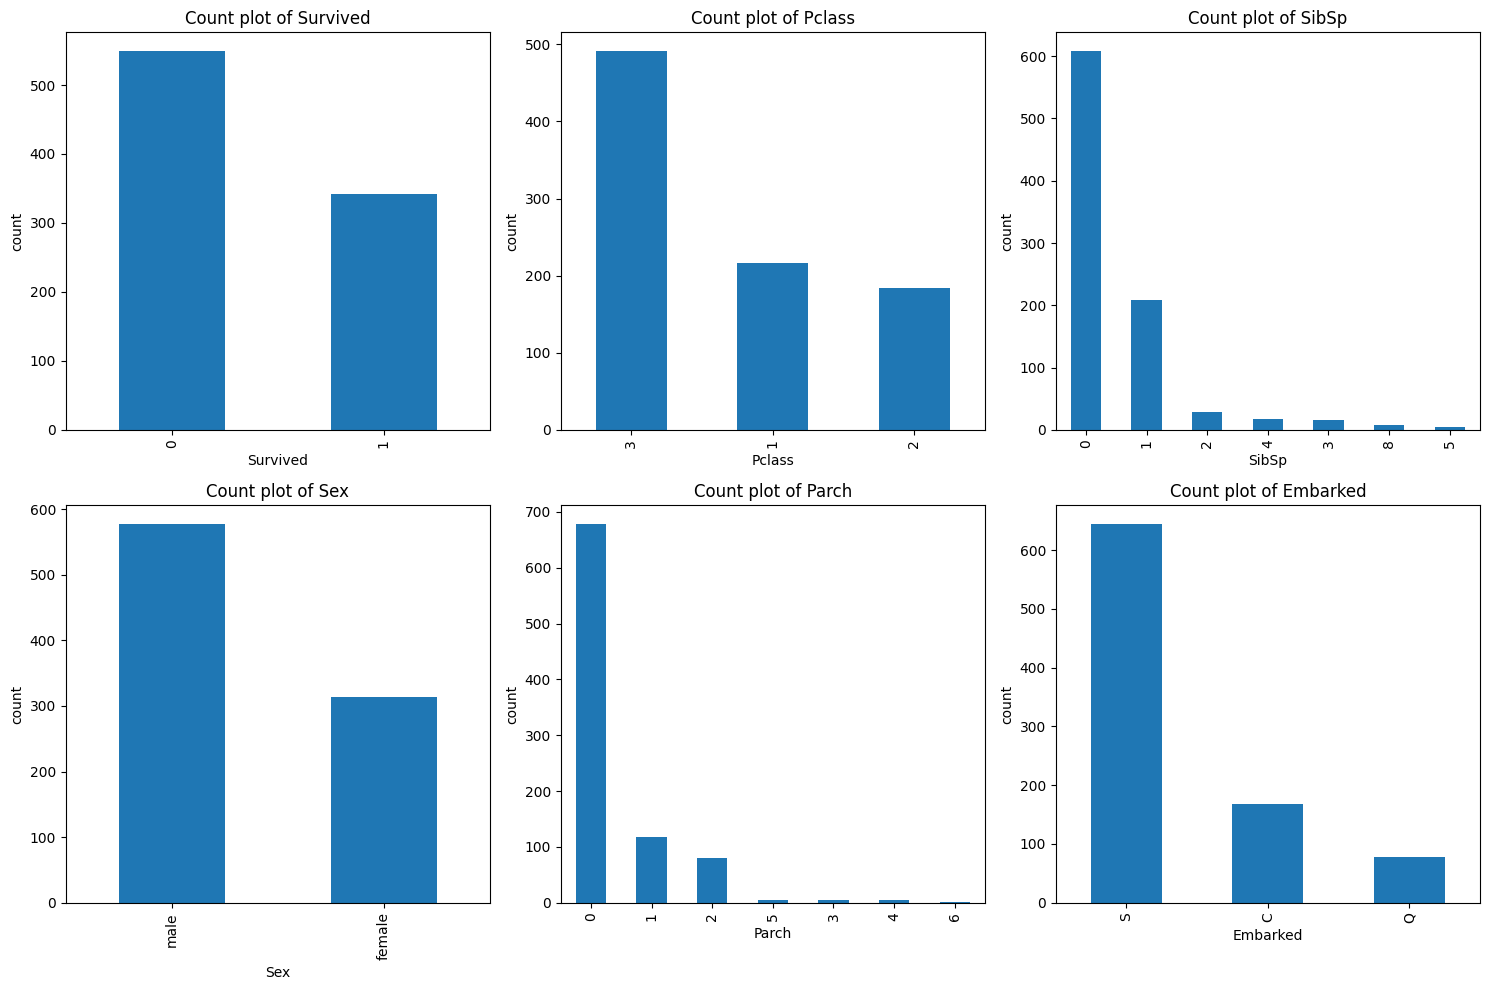

In [ ]:
var = ['Survived', 'Pclass', 'SibSp', 'Sex','Parch','Embarked']

fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for ax, var in zip(axes, var):
    df_train[var].value_counts().plot.bar(ax=ax)
    ax.set_title(f'Count plot of {var}')
    ax.set_xlabel(var)
    ax.set_ylabel('count')

plt.tight_layout()
plt.show()

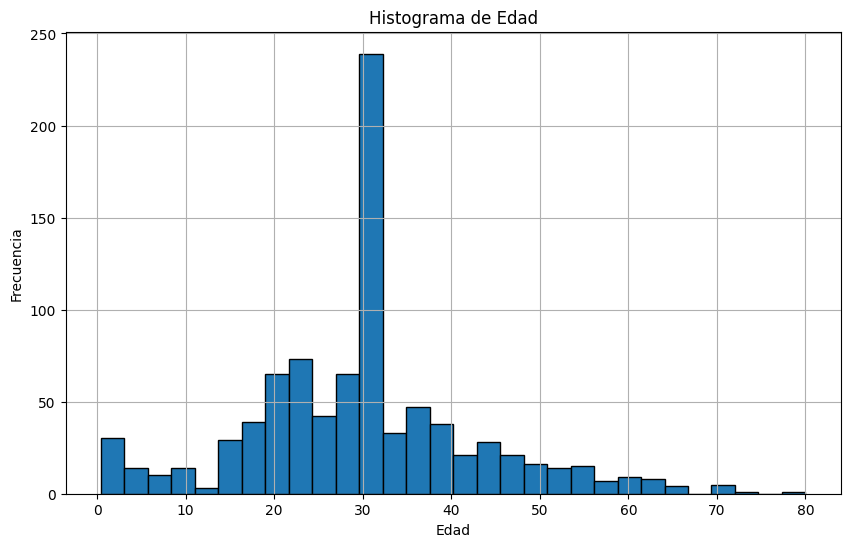

In [ ]:
plt.figure(figsize=(10, 6))
plt.hist(df_train['Age'], bins=30, edgecolor='black')
plt.title('Histograma de Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.grid(True)

plt.show()

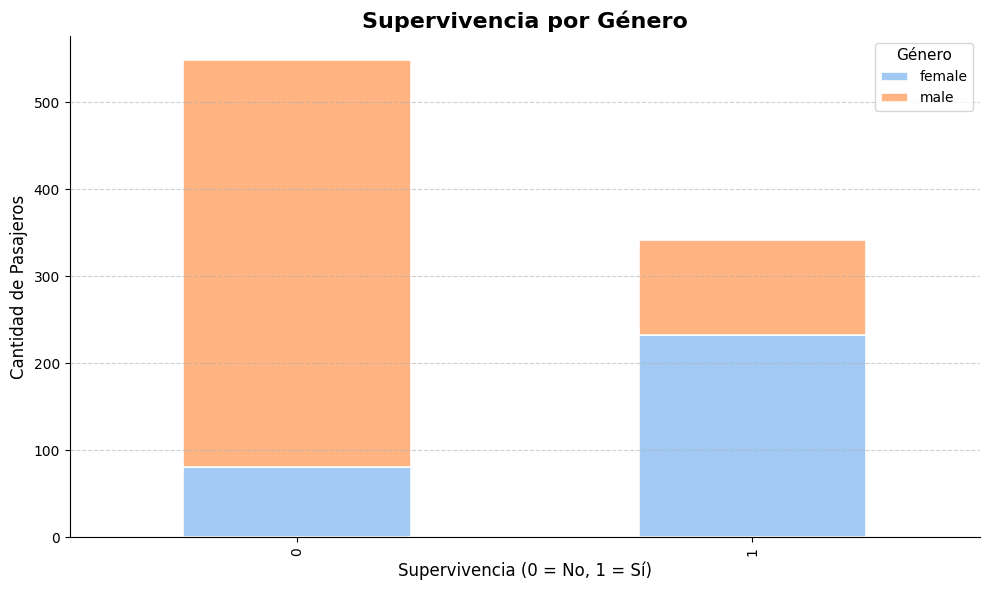

In [ ]:
tabla = pd.crosstab(df_train['Survived'], df_train['Sex'])


colors = ["#a1c9f4", "#ffb482"]


ax = tabla.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors,
    edgecolor="white",
    linewidth=1.2
)


plt.title('Supervivencia por Género', fontsize=16, fontweight='bold')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(title='Género', fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


/tmp/ipython-input-895006174.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax1 = sns.countplot(


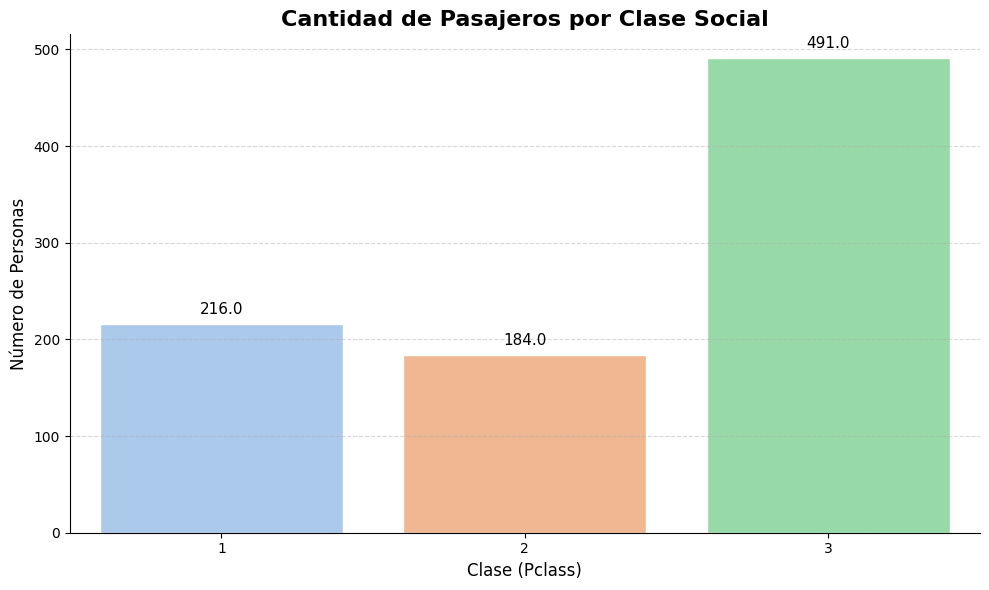

In [ ]:
plt.figure(figsize=(10, 6))


ax1 = sns.countplot(
    data=df_train,
    x='Pclass',
    palette=["#a1c9f4", "#ffb482", "#8de5a1"],
    order=[1, 2, 3],
    edgecolor="white"
)


ax1.set_title('Cantidad de Pasajeros por Clase Social', fontsize=16, fontweight='bold')
ax1.set_xlabel('Clase (Pclass)', fontsize=12)
ax1.set_ylabel('Número de Personas', fontsize=12)


for p in ax1.patches:
    ax1.annotate(f'{p.get_height()}',
                 (p.get_x() + p.get_width() / 2., p.get_height()),
                 ha='center', va='bottom',
                 fontsize=11, color='black', xytext=(0, 5),
                 textcoords='offset points')


sns.despine()

plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


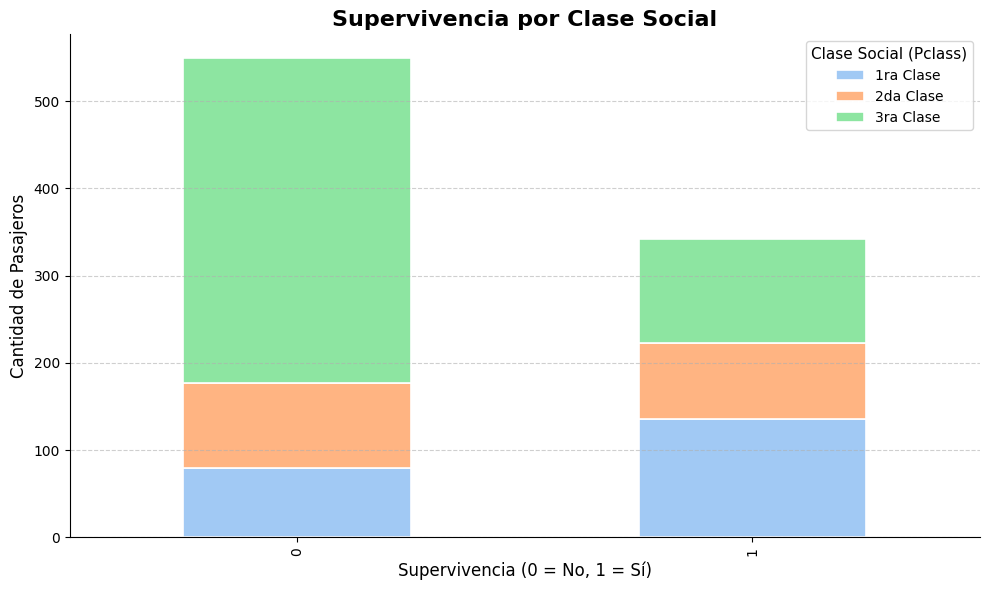

In [ ]:
# Tabla de contingencia: Supervivencia vs Clase social
tabla = pd.crosstab(df_train['Survived'], df_train['Pclass'])

# Colores para cada clase (puedes cambiar si quieres)
colors = ["#a1c9f4", "#ffb482", "#8de5a1"]

# Gráfico de barras apiladas
ax = tabla.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors,
    edgecolor="white",
    linewidth=1.2
)

# Personalización
plt.title('Supervivencia por Clase Social', fontsize=16, fontweight='bold')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(title='Clase Social (Pclass)', fontsize=10, title_fontsize=11, labels=["1ra Clase", "2da Clase", "3ra Clase"])
plt.grid(axis='y', linestyle='--', alpha=0.6)

# Estilo de bordes
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# Crear la nueva columna con categorías según la edad
df_train['GrupoEdad'] = pd.cut(df_train['Age'],
                         bins=[0, 17, 59, float('inf')],
                         labels=['Niño', 'Adulto', 'Mayor'])


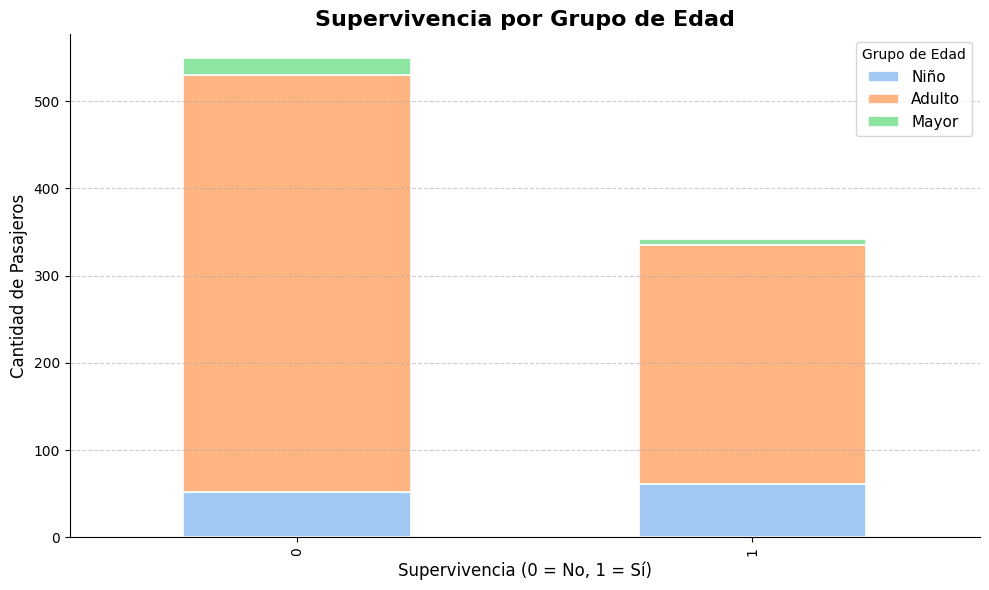

In [ ]:
tabla = pd.crosstab(df_train['Survived'], df_train['GrupoEdad'])


colors = ["#a1c9f4", "#ffb482", "#8de5a1", "#ff9f9b", "#d0bbff"]


ax = tabla.plot(
    kind='bar',
    stacked=True,
    figsize=(10, 6),
    color=colors,
    edgecolor="white",
    linewidth=1.2
)


plt.title('Supervivencia por Grupo de Edad', fontsize=16, fontweight='bold')
plt.xlabel('Supervivencia (0 = No, 1 = Sí)', fontsize=12)
plt.ylabel('Cantidad de Pasajeros', fontsize=12)
plt.legend(title='Grupo de Edad', fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


In [ ]:
# Crear variable FamilySize
df_train['TamFamilia'] = df_train['SibSp'] + df_train['Parch'] + 1

# Crear variable IsAlone
df_train['ViajoSolo'] = 0
df_train.loc[df_train['TamFamilia'] == 1, 'ViajoSolo'] = 1

# Verificamos
df_train[['SibSp', 'Parch', 'TamFamilia', 'ViajoSolo']].head(10)


,SibSp,Parch,TamFamilia,ViajoSolo
0,1,0,2,0
1,1,0,2,0
2,0,0,1,1
3,1,0,2,0
4,0,0,1,1
5,0,0,1,1
6,0,0,1,1
7,3,1,5,0
8,0,2,3,0
9,1,0,2,0


In [ ]:
# Crear variables derivadas en df_test igual que en train
df_test["TamFamilia"] = df_test["SibSp"] + df_test["Parch"] + 1
df_test["ViajoSolo"] = (df_test["TamFamilia"] == 1).astype(int)

# Crear grupos de edad igual que en train
df_test["GrupoEdad"] = pd.cut(
    df_test["Age"],
    bins=[0, 12, 18, 35, 60, 120],
    labels=["Niño", "Adolescente", "Adulto joven", "Adulto", "Anciano"]
)

/tmp/ipython-input-2118569793.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(


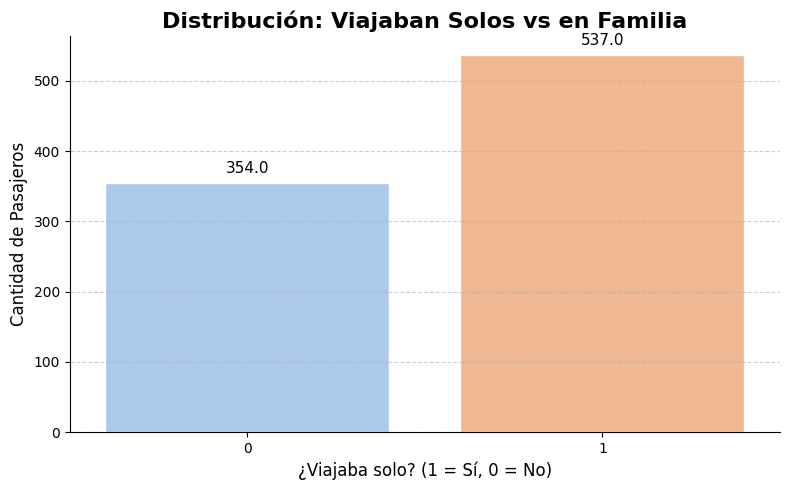

In [ ]:
plt.figure(figsize=(8,5))
ax = sns.countplot(
    data=df_train,
    x='ViajoSolo',
    palette=["#a1c9f4", "#ffb482"],
    edgecolor="white"
)


ax.set_title("Distribución: Viajaban Solos vs en Familia", fontsize=16, fontweight="bold")
ax.set_xlabel("¿Viajaba solo? (1 = Sí, 0 = No)", fontsize=12)
ax.set_ylabel("Cantidad de Pasajeros", fontsize=12)


for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

sns.despine()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


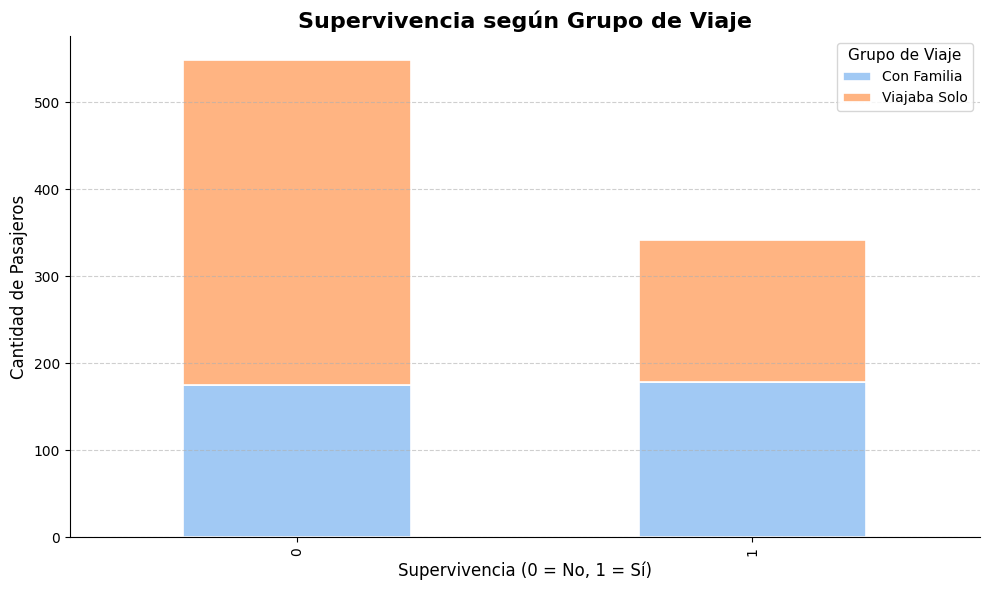

In [ ]:
df_train['Grupo'] = df_train['ViajoSolo'].map({1: 'Viajaba Solo', 0: 'Con Familia'})


tabla = pd.crosstab(df_train['Survived'], df_train['Grupo'])


colors = ["#a1c9f4", "#ffb482"]
ax = tabla.plot(
    kind='bar',
    stacked=True,
    figsize=(10,6),
    color=colors,
    edgecolor="white",
    linewidth=1.2
)


plt.title("Supervivencia según Grupo de Viaje", fontsize=16, fontweight="bold")
plt.xlabel("Supervivencia (0 = No, 1 = Sí)", fontsize=12)
plt.ylabel("Cantidad de Pasajeros", fontsize=12)
plt.legend(title="Grupo de Viaje", fontsize=10, title_fontsize=11)
plt.grid(axis='y', linestyle='--', alpha=0.6)


ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()
plt.show()


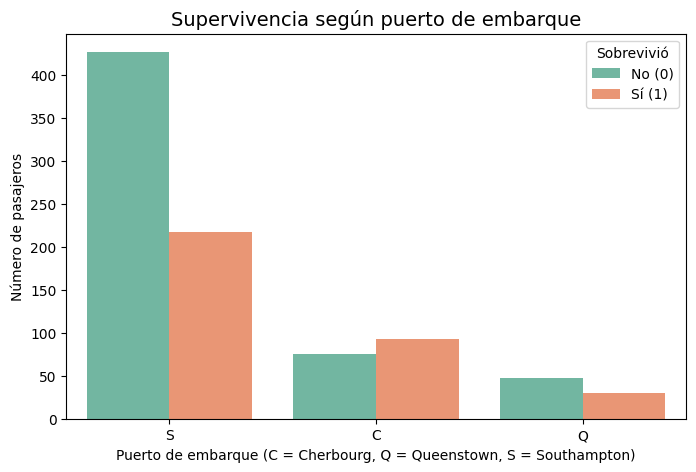

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(data=df_train, x="Embarked", hue="Survived", palette="Set2")

plt.title("Supervivencia según puerto de embarque", fontsize=14)
plt.xlabel("Puerto de embarque (C = Cherbourg, Q = Queenstown, S = Southampton)")
plt.ylabel("Número de pasajeros")
plt.legend(title="Sobrevivió", labels=["No (0)", "Sí (1)"])
plt.show()

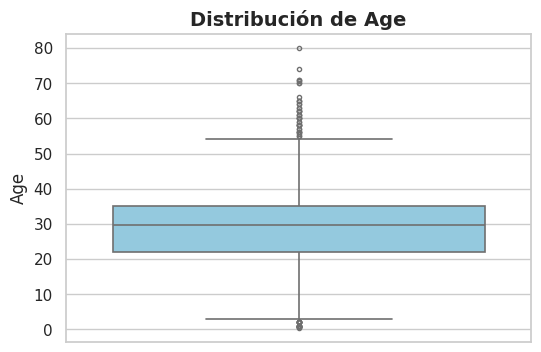

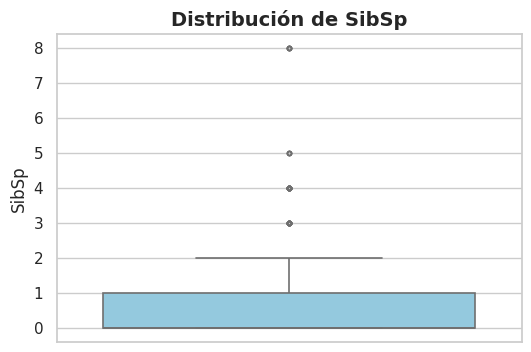

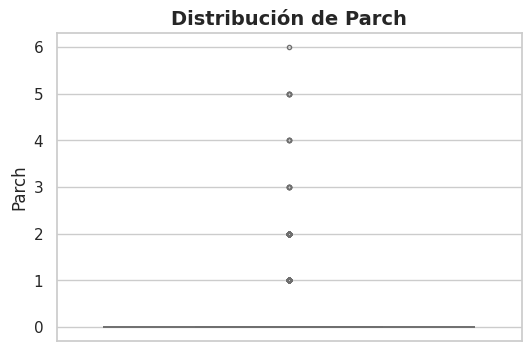

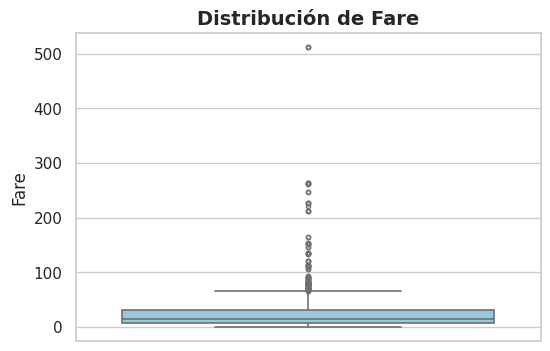

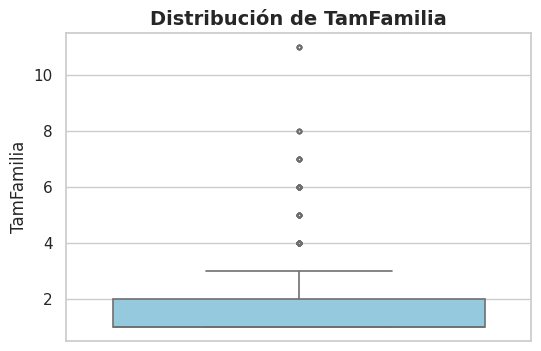

In [ ]:

sns.set_theme(style="whitegrid", palette="pastel")

# Ejemplo con variables numéricas
numerical_vars = ['Age', 'SibSp', 'Parch', 'Fare','TamFamilia']

for col in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.boxplot(data=df_train, y=col, color="skyblue", fliersize=3, linewidth=1.2)
    plt.title(f"Distribución de {col}", fontsize=14, weight="bold")
    plt.xlabel("")
    plt.ylabel(col, fontsize=12)
    plt.show()


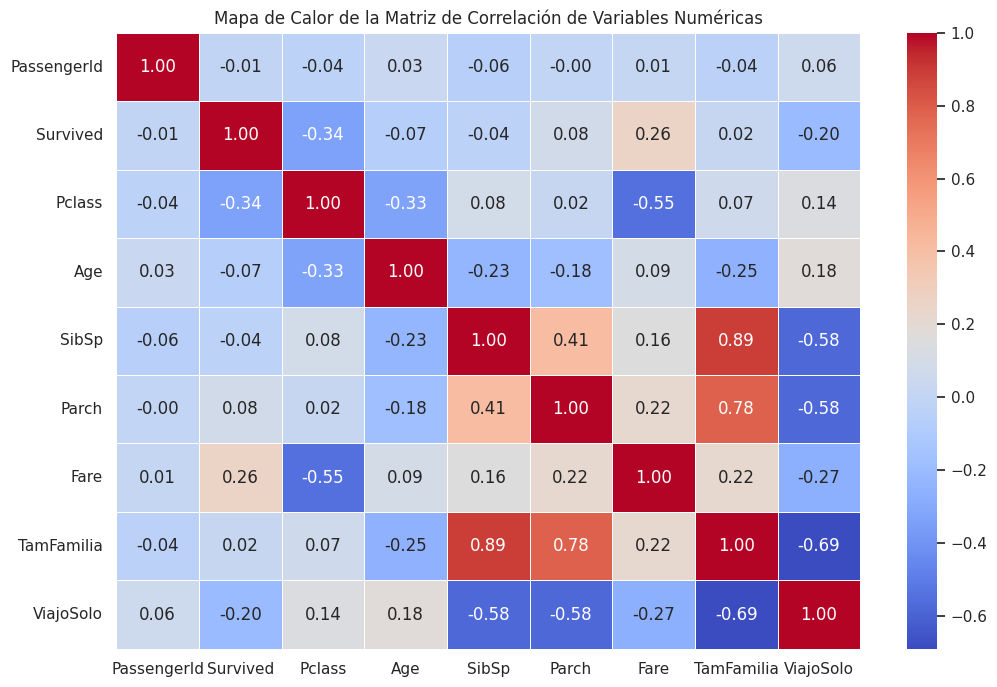

In [ ]:
# Seleccionar solo las columnas numéricas del DataFrame
df_numeric = df_train.select_dtypes(include=np.number)

# Calcular la matriz de correlación
corr_matrix = df_numeric.corr()

# Crear el mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Mapa de Calor de la Matriz de Correlación de Variables Numéricas')
plt.show()

#### En el mapa de calor podemos ver una relacion interesante, donde en la parte de Survived, podemos ver que la columna que mas tuvo relacion fue con el Fare, y es el precio del tiquete, dando a enteder a simple vista, que esta es la variable que mas relacion tiene en si la persona sobrevive o no.



#Creacion y seleccion de características


###Variables creadas
####Se generaron 3 columnas las cuales son:
- GrupoEdad : Categoriza en niño, adulto y mayor a las personas segun su edad, este para entender mejor su comportamiento y saber segun el indice de sobrevivencia, si la edad fue un factor importante.

- ViajoSolo : Esta clasifica con (1) si viajaba solo y con (0) si no viajaba solo, esta variable tambien puede ser de gran ayuda para entrenar el modelo, como se hizo anteriormente un grafico, podemos ver como una gran proporcion de la gente que viajo sola, pudo sobrevivir.

- TamFamilia : Esta variable sumaba el tamaño de la familia (SibSp + Parch + 1 (El uno es de la persona que tenia la familia)), se genero tambien para saber su comportamiento y ver si puede ser una variable de interes para entrenar el modelo y ver si hay cierta ventaja de viajar en familia o si fue de lo contrario.
- Sex_num : Se agrego esta variable como Sex pero numerica, en donde 1 representa a hombre y 0 representa a mujer

In [ ]:
df_train["Sex_num"] = df_train["Sex"].replace({"male": 1, "female": 0})
df_test["Sex_num"] = df_test["Sex"].replace({"male": 1, "female": 0})

/tmp/ipython-input-2134470997.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_train["Sex_num"] = df_train["Sex"].replace({"male": 1, "female": 0})
/tmp/ipython-input-2134470997.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_test["Sex_num"] = df_test["Sex"].replace({"male": 1, "female": 0})


In [ ]:
# ==== TRAIN ====
# Crear variables dummies para Embarked y convertir a enteros
embarked_dummies_train = pd.get_dummies(df_train["Embarked"], prefix="Embarked").astype(int)

# Asegurar que siempre existan todas las categorías
for col in ["Embarked_C", "Embarked_Q", "Embarked_S"]:
    if col not in embarked_dummies_train:
        embarked_dummies_train[col] = 0

# Unir al df_train
df_train = pd.concat([df_train, embarked_dummies_train], axis=1)

In [ ]:
# ==== TEST ====
# Crear variables dummies para Embarked y convertir a enteros
embarked_dummies_test = pd.get_dummies(df_test["Embarked"], prefix="Embarked").astype(int)

# Asegurar que siempre existan todas las categorías
for col in ["Embarked_C", "Embarked_Q", "Embarked_S"]:
    if col not in embarked_dummies_test:
        embarked_dummies_test[col] = 0

# Unir al df_test
df_test = pd.concat([df_test, embarked_dummies_test], axis=1)


## Columnas relevantes

####Se excluyo variables como el Name, PassengerId, Ticket, y Cabin ya que no ofrecia informacion importamte para el entrenamiento del modelo, pues no se podia sacar una relacion entre si estas tienen un peso para que la persona sobreviva o no.

#Definición de los componentes claves de un modelo

###Al usar un modelo de regresion logistica, vamos a escalar las variables numericas

In [ ]:
# Selección de features numéricas y categóricas (ya procesadas/escaladas)
features = ["Pclass", "Sex_num", "Age", "Fare", "TamFamilia", "ViajoSolo",
            "Embarked_C", "Embarked_Q", "Embarked_S"]

X_train = df_train[features].values
y_train = df_train["Survived"].values

# Escalado de las variables numéricas (ejemplo si no lo has hecho aún)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Modelo de Regresión Logística

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def binary_cross_entropy(y_true, y_pred):
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

class LogisticRegression:
    def __init__(self, learning_rate=0.01, iterations=1000):
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for iteration in range(self.iterations):
            # Linear combination
            z = np.dot(X, self.weights) + self.bias
            y_pred = sigmoid(z)

            # Gradients
            dw = (1 / n_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / n_samples) * np.sum(y_pred - y)

            # Update parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

            # Loss cada 100 iteraciones
            if iteration % 100 == 0:
                loss = binary_cross_entropy(y, y_pred)
                print(f"Iteración {iteration}, Pérdida: {loss}")

    def predict(self, X):
        z = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(z)
        return (y_pred > 0.5).astype(int)

####Explicacion de la funcion de perdida escogida

La funcion de perdida es : Entropía Cruzada Binaria

Esta se adapta mejor al contexto ya que :

- Esta diseñada para la clasificacion binaria
- Penaliza el modelo cuando hay falsos positivos o falsos negativos

Por que no se eligio el Mean Squared Error :

- La derivada de la sigmoide se aplana mucho en valores extremos (0 o 1), y con MSE eso puede causar gradientes muy pequeños → el modelo aprende lento o incluso se queda estancado.

In [ ]:
model.bias

np.float64(-0.6615393487898383)

### Modelo de regresion

###Descripcion del funcionamiento del modelo

El método de entrenamiento implementado es Descenso de Gradiente y funciona de la siguiente manera:

1. Inicialización :

Se ponen los pesos en cero (self.weights) y el bias en cero.

2. Cálculo de la predicción :

Para cada ejemplo, se hace una combinación lineal (z = X·w + b).
Se aplica la sigmoide para convertir ese valor en una probabilidad y_pred.

3. Cálculo de gradientes :

Se calcula cuánto debe ajustarse cada peso (dw) y el sesgo (db), derivando la función de pérdida respecto a los parámetros.

4. Actualización de parámetros :

Se mueven los pesos y el bias en dirección contraria al gradiente, con el tamaño del paso controlado por learning_rate.

# Entrenamiento del Modelo

In [ ]:
# Entrenar modelo
model = LogisticRegression(learning_rate=0.1, iterations=1000)
model.fit(X_train_scaled, y_train)

# Predicciones (en train)
y_pred_train = model.predict(X_train_scaled)

from sklearn.metrics import accuracy_score
acc = accuracy_score(y_train, y_pred_train)
print(f"Exactitud en train: {acc:.4f}")


Iteración 0, Pérdida: 0.6931471805599453
Iteración 100, Pérdida: 0.4479037963471
Iteración 200, Pérdida: 0.4368468371739044
Iteración 300, Pérdida: 0.4345585981782592
Iteración 400, Pérdida: 0.4338511980385875
Iteración 500, Pérdida: 0.43359373675065316
Iteración 600, Pérdida: 0.4334923826945963
Iteración 700, Pérdida: 0.43344997344417713
Iteración 800, Pérdida: 0.4334307665529111
Iteración 900, Pérdida: 0.4334209653114447
Exactitud en train: 0.8062


# Evaluación del Modelo

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred_train = model.predict(X_train_scaled)

print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("\nMatriz de confusión:\n", confusion_matrix(y_train, y_pred_train))
print("\nReporte de clasificación:\n", classification_report(y_train, y_pred_train))

Accuracy: 0.8061797752808989

Matriz de confusión:
 [[380  59]
 [ 79 194]]

Reporte de clasificación:
               precision    recall  f1-score   support

           0       0.83      0.87      0.85       439
           1       0.77      0.71      0.74       273

    accuracy                           0.81       712
   macro avg       0.80      0.79      0.79       712
weighted avg       0.80      0.81      0.80       712



# Con la evaluación del modelo se puede observar que se logró un 80.6% de precisión. Entrando más en detalle por cada métrica:


*   En precisión, hay un 83% de precisión en no sobrevivientes y un 77% en sobrevivientes.
*   En recall, nos dice que el modelo logra captar un 87% de los no sobrevivientes, pero en los sobrevivientes no detecta a un 29%.
*   El F1-score muestra que el modelo tiene un rendimiento superior detectando no sobrevivientes en general, que sobrevivientes.
*   La matriz de confusión nuevamente muestra, con un balance de las detecciones correctas e incorrectas y los falsos positivos y negativos, que el modelo deja escapar bastantes más aciertos en sobrevivientes.




# Función de Predicción de los datos de testeo

In [ ]:
# Selección de features para el test (mismas que en train)
X_test = df_test[features].values

# Escalado con el mismo scaler
X_test_scaled = scaler.transform(X_test)

# Predicciones con tu modelo
y_test_pred = model.predict(X_test_scaled)

# Crear submission
predicciones = pd.DataFrame({
    "PassengerId": df_test["PassengerId"].astype(int),
    "Survived": y_test_pred.astype(int)
})

# Guardar archivo CSV
predicciones.to_csv("predicciones.csv", index=False)
print("Archivo 'predicciones.csv' creado correctamente")


Archivo 'predicciones.csv' creado correctamente ✅


In [ ]:
#Descargar el archivo
from google.colab import files
files.download("predicciones.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>